In [14]:
import pandas as pd

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\varsha study materiall\ml workshop\HousePrice.csv")


In [20]:
df.head(50)

,Size (sqft),Rooms,Age (years),Location,Garage,Bathrooms,Price ($)
0,2000,4,10,Urban,1,2,"5,00,000"
1,1500,3,5,Suburban,0,1,"3,50,000"
2,2500,5,15,Urban,1,3,"7,50,000"
3,1800,4,20,Rural,0,2,"3,00,000"
4,3000,6,8,Urban,1,4,"9,50,000"
5,1200,2,25,Suburban,0,1,"2,00,000"
6,2200,4,5,Urban,1,3,"5,50,000"
7,1600,3,10,Suburban,1,2,"3,75,000"
8,2800,5,12,Urban,1,3,"8,00,000"
9,1900,4,18,Rural,1,2,"4,00,000"


In [22]:
# Missing values check karna
print(df.isnull().sum())


Size (sqft)    0
Rooms          0
Age (years)    0
Location       0
Garage         0
Bathrooms      0
Price ($)      0
dtype: int64


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Size (sqft)  38 non-null     int64 
 1   Rooms        38 non-null     int64 
 2   Age (years)  38 non-null     int64 
 3   Location     38 non-null     object
 4   Garage       38 non-null     int64 
 5   Bathrooms    38 non-null     int64 
 6   Price ($)    38 non-null     object
dtypes: int64(5), object(2)
memory usage: 2.2+ KB


In [28]:
# Remove $ and commas if any, then convert to int
df["Price ($)"] = df["Price ($)"].replace(r'[\$,]', '', regex=True).astype(int)



In [34]:
# Columns rename
df.rename(columns={"Price ($)": "Price"}, inplace=True)

In [36]:
# Outlier removal (Price < 1 crore rakha)
df = df[df["Price"] < 10000000]

 (EDA & Feature Engineering)

In [38]:
#Dataset Summary check karo
print(df.describe())
print(df.info())



       Size (sqft)      Rooms  Age (years)     Garage  Bathrooms  \
count    38.000000  38.000000    38.000000  38.000000  38.000000   
mean   2194.736842   4.289474    13.657895   0.684211   2.789474   
std     466.121066   1.037354     6.874458   0.471069   0.963044   
min    1200.000000   2.000000     5.000000   0.000000   1.000000   
25%    1825.000000   4.000000     8.250000   0.000000   2.000000   
50%    2200.000000   4.000000    12.000000   1.000000   3.000000   
75%    2575.000000   5.000000    18.000000   1.000000   3.000000   
max    3000.000000   6.000000    30.000000   1.000000   5.000000   

               Price  
count      38.000000  
mean   565394.736842  
std    216680.676682  
min    200000.000000  
25%    376250.000000  
50%    550000.000000  
75%    737500.000000  
max    950000.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ---

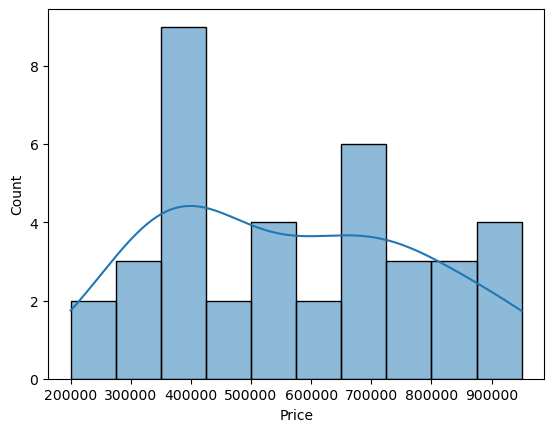

In [40]:
#Distribution check karo (Price, Size, Rooms, etc).
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Price"], bins=10, kde=True)
plt.show()


In [42]:
# Categorical vs Numerical split karo
#Numerical: Size, Rooms, Age, Bathrooms, Garage, Price
#Categorical: Location
print(df.select_dtypes(include=["int64", "float64"]).columns)
print(df.select_dtypes(include=["object"]).columns)


Index(['Size (sqft)', 'Rooms', 'Age (years)', 'Garage', 'Bathrooms'], dtype='object')
Index(['Location'], dtype='object')


In [46]:
print(df.columns)

Index(['Size (sqft)', 'Rooms', 'Age (years)', 'Location', 'Garage',
       'Bathrooms', 'Price'],
      dtype='object')


In [48]:
# Define the target variable
y = df['Price']

# Define the feature variables (excluding 'Price')
X = df[['Size (sqft)', 'Rooms', 'Age (years)', 'Location', 'Garage', 'Bathrooms']]

In [50]:
# Convert categorical column to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4911753619.171805
R² Score: 0.9251395258290032


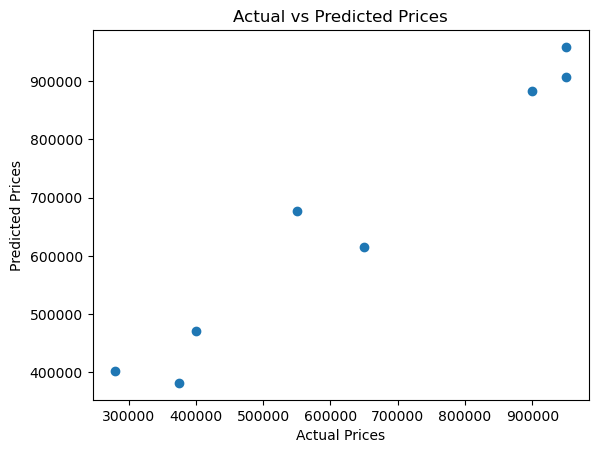

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

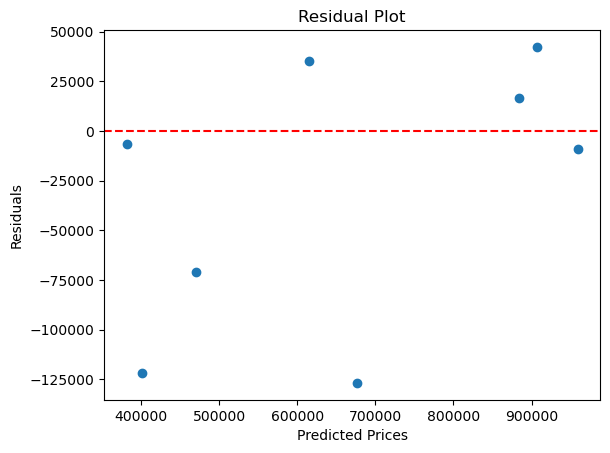

In [60]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 53602.38
MSE: 4911753619.17
RMSE: 70083.90
R² Score: 0.93


In [64]:
print(model.coef_)
print(model.intercept_)

[ 1.21357978e+02  4.26433847e+04 -2.85380320e+03  9.50892208e+03
  5.70840850e+04  9.95959190e+04  1.96394237e+05]
-123695.19650065969
